### Importa√ß√£o dos dados



In [68]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head(3)


Produto Categoria do Produto   Pre√ßo      Frete Data da Compra  \
0  Assistente virtual          eletronicos  219.08   9.249790     16/01/2021   
1      Mesa de jantar               moveis  256.35  11.234305     18/05/2022   
2   Jogo de tabuleiro           brinquedos  279.51  21.262681     15/03/2021   

         Vendedor Local da compra  Avalia√ß√£o da compra Tipo de pagamento  \
0     Pedro Gomes              SP                    4    cartao_credito   
1  Beatriz Moraes              RJ                    1    cartao_credito   
2      Jo√£o Souza              DF                    1    cartao_credito   

   Quantidade de parcelas    lat    lon  
0                       8 -22.19 -48.79  
1                       4 -22.25 -42.66  
2                       1 -15.83 -47.86

In [43]:
import plotly.express as px
import matplotlib.pyplot as plt

In [69]:
type(loja)

pandas.core.frame.DataFrame

#1. An√°lise do faturamento


In [45]:
#Calculando e armazenando o faturamento das lojas separadamente

def fatLoja(loja):
  fat_loja = sum(loja['Pre√ßo'])
  fat_loja = round(fat_loja,2)
  return fat_loja

fat_loja = fatLoja(loja)
fat_loja2 = fatLoja(loja2)
fat_loja3 = fatLoja(loja3)
fat_loja4 = fatLoja(loja4)

print('Faturamento da Loja 1:',fat_loja)
print('Faturamento da Loja 2:',fat_loja2)
print('Faturamento da Loja 3:',fat_loja3)
print('Faturamento da Loja 4:',fat_loja4)


Faturamento da Loja 1: 1534509.12
Faturamento da Loja 2: 1488459.06
Faturamento da Loja 3: 1464025.03
Faturamento da Loja 4: 1384497.58


# 2. Vendas por Categoria


In [46]:
loja['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [47]:
def conta_categorias(df, coluna):

    contagem = df[coluna].value_counts().to_dict()

    for categoria, qtd in contagem.items():
        print(f"{categoria}: {qtd}")

    return contagem

print('LOJA 1:')
resultado1 = conta_categorias(loja, 'Categoria do Produto')
print('\nLOJA 2:')
resultado2 = conta_categorias(loja2, 'Categoria do Produto')
print('\nLOJA 3:')
resultado3 = conta_categorias(loja3, 'Categoria do Produto')
print('\nLOJA 4:')
resultado4 = conta_categorias(loja4, 'Categoria do Produto')


LOJA 1:
moveis: 465
eletronicos: 448
brinquedos: 324
eletrodomesticos: 312
esporte e lazer: 284
instrumentos musicais: 182
livros: 173
utilidades domesticas: 171

LOJA 2:
moveis: 442
eletronicos: 422
brinquedos: 313
eletrodomesticos: 305
esporte e lazer: 275
instrumentos musicais: 224
livros: 197
utilidades domesticas: 181

LOJA 3:
moveis: 499
eletronicos: 451
brinquedos: 315
eletrodomesticos: 278
esporte e lazer: 277
livros: 185
instrumentos musicais: 177
utilidades domesticas: 177

LOJA 4:
moveis: 480
eletronicos: 451
brinquedos: 338
esporte e lazer: 277
eletrodomesticos: 254
utilidades domesticas: 201
livros: 187
instrumentos musicais: 170


# 3. M√©dia de Avalia√ß√£o das Lojas

In [48]:
media1 = loja['Avalia√ß√£o da compra'].mean()
media2 = loja2['Avalia√ß√£o da compra'].mean()
media3 = loja3['Avalia√ß√£o da compra'].mean()
media4 = loja4['Avalia√ß√£o da compra'].mean()

print('M√©dia de avalia√ß√£o Loja 1:', round(media1,2))
print('M√©dia de avalia√ß√£o Loja 2:', round(media2,2))
print('M√©dia de avalia√ß√£o Loja 3:', round(media3,2))
print('M√©dia de avalia√ß√£o Loja 4:', round(media4,2))


M√©dia de avalia√ß√£o Loja 1: 3.98
M√©dia de avalia√ß√£o Loja 2: 4.04
M√©dia de avalia√ß√£o Loja 3: 4.05
M√©dia de avalia√ß√£o Loja 4: 4.0



# 4. Produtos Mais e Menos Vendidos

In [49]:

def prod_mais_menos_vendidos(loja_,nome_loja):

  mais_vendidos = loja_['Produto'].value_counts().head(3)
  menos_vendidos = loja_['Produto'].value_counts().sort_values().head(3)

  print(f'{nome_loja}:')
  print('Produtos mais vendidos:')
  print(mais_vendidos)
  print('\nProdutos menos vendidos:')
  print(menos_vendidos)
  print('---------------------------------\n')

prod_mais_menos_vendidos(loja,'LOJA 1')
prod_mais_menos_vendidos(loja2,'LOJA 2')
prod_mais_menos_vendidos(loja3,'LOJA 3')
prod_mais_menos_vendidos(loja4,'LOJA 4')


LOJA 1:
Produtos mais vendidos:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Produtos menos vendidos:
Produto
Headset              33
Celular ABXY         33
Panela de press√£o    35
Name: count, dtype: int64
---------------------------------

LOJA 2:
Produtos mais vendidos:
Produto
Iniciando em programa√ß√£o    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Produtos menos vendidos:
Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Name: count, dtype: int64
---------------------------------

LOJA 3:
Produtos mais vendidos:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64

Produtos menos vendidos:
Produto
Blocos de montar    35
Micro-ondas         36
Jogo de copos       36
Name: count, dtype: int64
---------------------------------

LOJA 4:
Produtos mais vendidos:
Produto
Cama box                   62
Faqueiro       

# 5. Frete M√©dio por Loja


In [50]:
media_frete1 = loja['Frete'].mean()
media_frete2 = loja2['Frete'].mean()
media_frete3 = loja3['Frete'].mean()
media_frete4 = loja4['Frete'].mean()

print(f'M√©dia de frete para Loja 1: R${media_frete1:.2f}')
print(f'M√©dia de frete para Loja 2: R${media_frete2:.2f}')
print(f'M√©dia de frete para Loja 3: R${media_frete3:.2f}')
print(f'M√©dia de frete para Loja 4: R${media_frete4:.2f}')


M√©dia de frete para Loja 1: R$34.69
M√©dia de frete para Loja 2: R$33.62
M√©dia de frete para Loja 3: R$33.07
M√©dia de frete para Loja 4: R$31.28


# GR√ÅFICOS PARA VISUALIZA√á√ÉO DOS DADOS

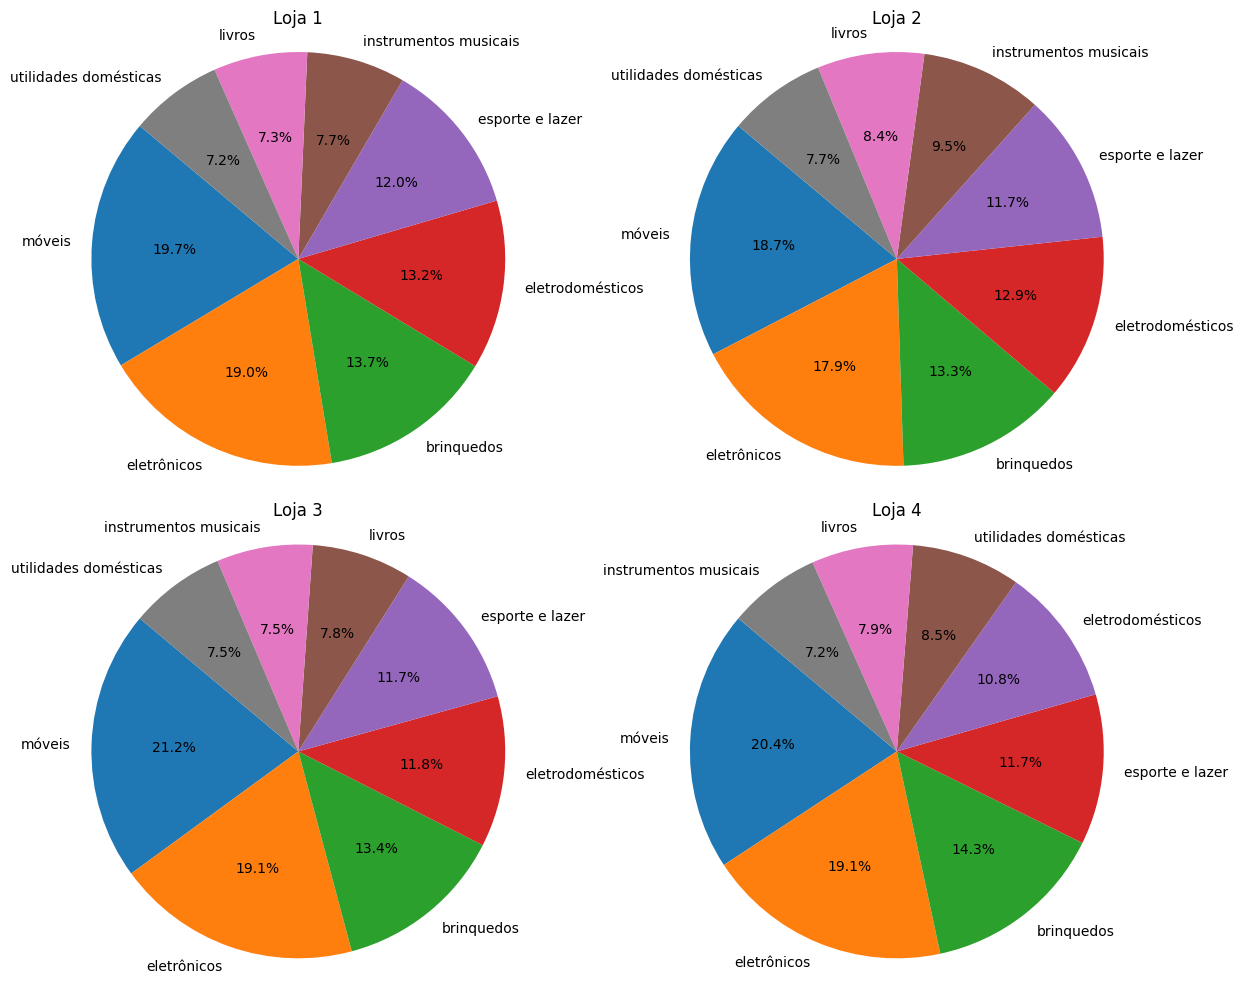

In [56]:
lojas = {
    'Loja 1': {
        'm√≥veis': 465, 'eletr√¥nicos': 448, 'brinquedos': 324, 'eletrodom√©sticos': 312,
        'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades dom√©sticas': 171
    },
    'Loja 2': {
        'm√≥veis': 442, 'eletr√¥nicos': 422, 'brinquedos': 313, 'eletrodom√©sticos': 305,
        'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades dom√©sticas': 181
    },
    'Loja 3': {
        'm√≥veis': 499, 'eletr√¥nicos': 451, 'brinquedos': 315, 'eletrodom√©sticos': 278,
        'esporte e lazer': 277, 'livros': 185, 'instrumentos musicais': 177, 'utilidades dom√©sticas': 177
    },
    'Loja 4': {
        'm√≥veis': 480, 'eletr√¥nicos': 451, 'brinquedos': 338, 'esporte e lazer': 277,
        'eletrodom√©sticos': 254, 'utilidades dom√©sticas': 201, 'livros': 187, 'instrumentos musicais': 170
    }
}

# Configura√ß√£o do gr√°fico
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Gerar gr√°ficos de pizza
for i, (loja_, categorias) in enumerate(lojas.items()):
    labels = list(categorias.keys())
    sizes = list(categorias.values())
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[i].axis('equal')  # Para manter o formato circular
    axs[i].set_title(loja_)

plt.tight_layout()
plt.show()

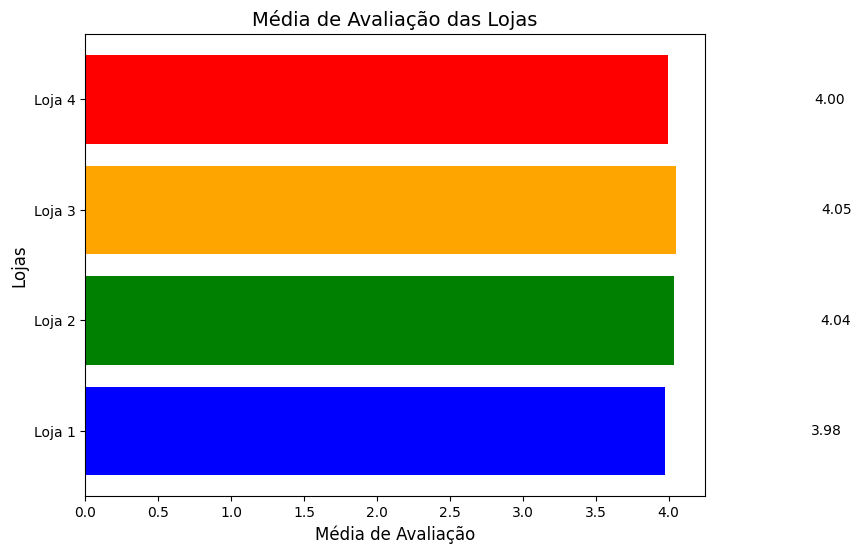

In [52]:

# Dados das lojas e suas respectivas m√©dias
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [media1, media2, media3, media4]  # Aqui voc√™ coloca suas m√©dias

# Criando o gr√°fico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(lojas, avaliacoes, color=['blue', 'green', 'orange', 'red'])

# Adicionando o valor das m√©dias nas barras
for i, valor in enumerate(avaliacoes):
    plt.text(valor + 1, i, f'{valor:.2f}', va='center', ha='left')

# Adicionando t√≠tulo e r√≥tulos
plt.title('M√©dia de Avalia√ß√£o das Lojas', fontsize=14)
plt.xlabel('M√©dia de Avalia√ß√£o', fontsize=12)
plt.ylabel('Lojas', fontsize=12)

# Exibindo o gr√°fico
plt.show()


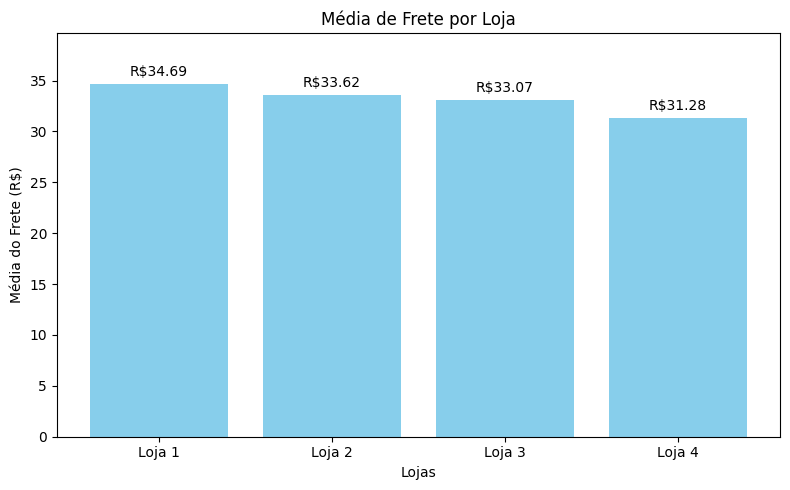

In [70]:
media_frete1 = loja['Frete'].mean()
media_frete2 = loja2['Frete'].mean()
media_frete3 = loja3['Frete'].mean()
media_frete4 = loja4['Frete'].mean()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [media_frete1, media_frete2, media_frete3, media_frete4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color='skyblue')
plt.title('M√©dia de Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('M√©dia do Frete (R$)')
plt.ylim(0, max(medias) + 5)

for i, valor in enumerate(medias):
    plt.text(i, valor + 0.5, f'R${valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# üìä Relat√≥rio de An√°lise Comparativa ‚Äì Recomenda√ß√£o de Venda de Unidade Comercial

## 1. Introdu√ß√£o

Esse relat√≥rio tem como objetivo apresentar uma an√°lise comparativa entre quatro unidades comerciais de uma rede, servindo como apoio a tomada de decis√£o do propiet√°rio sobre qual das quatros lojas dever√° ser fechada. Para isso, foram considerados os seguintes crit√©rios:

- **Faturamento total**
- **Vendas por categoria**
- **M√©dia de avalia√ß√£o dos clientes**
- **Frete m√©dio**
- **Produtos mais e menos vendidos**

## üí∞ 2. An√°lise dos Dados

### 2.1 Faturamento Total

| Loja   | Faturamento Total (R$) |
|--------|------------------------|
| Loja 1 | **1.534.509,12**       |
| Loja 2 | 1.488.459,06           |
| Loja 3 | 1.464.025,03           |
| Loja 4 | **1.384.497,58**       |

‚û°Ô∏è **Loja 1** lidera com maior faturamento. **Loja 4** tem o menor retorno financeiro.

---

### 2.2 Vendas por Categoria

- **Loja 3** lidera em **m√≥veis** (499) e **eletr√¥nicos** (451), categorias de alto valor.
- **Loja 1** se destaca em **eletrodom√©sticos** (312).
- **Loja 2** tem bom desempenho em **instrumentos musicais** e **livros**, mas s√£o itens com menor valor normalmente.
- **Loja 4** lidera apenas em **brinquedos** e **utilidades dom√©sticas**, o que pode gerar pouco impacto no faturamento.

---

### 2.3 Avalia√ß√£o dos Clientes

| Loja   | M√©dia de Avalia√ß√£o |
|--------|---------------------|
| Loja 3 | **4.05**            |
| Loja 2 | 4.04                |
| Loja 4 | 4.00                |
| Loja 1 | 3.98                |

‚û°Ô∏è **Loja 3** tem a melhor avalia√ß√£o de clientes. **Loja 1** a menor, embora ainda pode ser considerado uma avalia√ß√£o razo√°vel.

---

### 2.4 Produtos Mais e Menos Vendidos

- **Loja 1**: Vendas fortes de **Micro-ondas**, **TV UHD 4K** e **Guarda-roupas** (60 unidades cada).
- **Loja 2**: Produtos mais vendidos s√£o de menor valor, como **"Iniciando em programa√ß√£o"** (Livro).
- **Loja 3**: Itens mais vendidos s√£o m√≥veis (ex: **Cama King**, **Kit Banquetas**), normalmente produtos com valor consideravelmente altos.
- **Loja 4**: Apesar de bons volumes em itens variados, h√° pouca sa√≠da de produtos com valores consider√°veis, como por exemplo **Guitarra** e **Guarda-roupas**.

---

### 2.5 Frete M√©dio por Loja

| Loja   | Frete M√©dio (R$) |
|--------|------------------|
| Loja 4 | **31,28**        |
| Loja 3 | 33,07            |
| Loja 2 | 33,62            |
| Loja 1 | 34,69            |

‚û°Ô∏è **Loja 4** tem a menor m√©dia de frete, o que √© um ponto positivo do ponto de vista log√≠stico. J√° a **Loja 1** possui a maior m√©dia de frete.

---


## ‚úÖ 3. Conclus√£o e Recomenda√ß√£o

Com base na an√°lise, a recomenda√ß√£o √© que o Sr. Jo√£o **venda a Loja 4**.

### üîç Justificativas:

- **Menor faturamento** entre todas as unidades.
- **Desempenho mediano** nas avalia√ß√µes dos clientes.
- **N√£o lidera categorias de alto impacto financeiro** como m√≥veis ou eletr√¥nicos.
- **Produtos menos vendidos** incluem itens de alto valor, indicando dificuldades de giro de estoque.
- Mesmo com **menor frete m√©dio**, **o custo-benef√≠cio geral √© desfavor√°vel**.

Por outro lado:

- **Loja 1** √© a mais lucrativa, apesar da menor avalia√ß√£o.
- **Loja 3** combina **melhor avalia√ß√£o, bom faturamento** e bom desempenho em produtos e categorias fortes e estrat√©gicas.
- **Loja 2** possui um bom equil√≠brio em todos os pontos, al√©m de se destacar na avalia√ß√£o dos clientes.

---

### üèÅ Conclus√£o Final:

‚û°Ô∏è A **Loja 4 √© a menos vantajosa**, e segundo a an√°lise feita √© a mais vi√°vel de ser escolhida para a venda.
